# Clustering
## Les données

Pour ce exercice, nous tenterons d'utiliser le clustering **K-Means** pour regrouper les universités en deux groupes, privés et publics. Nous utiliserons une base de données avec 777 observations sur les 18 variables suivantes.

* Private Un facteur avec les niveaux Non et Oui indiquant une université privée ou publique
* Apps Nombre de candidatures reçues
* Accept Nombre d'applications acceptées
* Enroll Nombre de nouveaux étudiants inscrits
* Top10perc PCT. nouveaux étudiants parmi les 10% supérieurs de H.S. classe
* Top25perc PCT. nouveaux étudiants parmi les 25% supérieurs de H.S. classe
* F.Undergrad Nombre d'étudiants à temps plein
* P.Undergrad Nombre d'étudiants de premier cycle à temps partiel
* Outstate Frais de scolarité hors de l'État
* Room.Board Frais de chambre et de pension
* Livres Coûts estimés des livres
* Dépenses personnelles estimées personnelles
* PhD Pct. des professeurs titulaires d'un doctorat
* Terminal PCT. du corps professoral avec diplôme terminal
* Ratio S.F. Ratio étudiants / professeurs
* perc.alumni PCT. anciens qui font un don
* Dépense. les dépenses d'enseignement par élève
* Grad.Rate Taux de diplomation

## Q1: Chargement des données

**a. Lisez le fichier College_Data à l'aide de read_csv. Découvrez comment définir la première colonne comme index.**

In [65]:
%matplotlib inline
import sys
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("data/College_Data.csv", index_col = 0)

**b.Vérifiez les premier lignes avec la finction head()**

In [54]:
univ = pd.DataFrame(data)
univ.head(100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


**c.  Vérifiez les informations sur les données avec la méthodes info().**

In [19]:
univ.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


**d. faites une description des données avec la methode describe ().**

In [90]:
univ.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [91]:
univ.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

## Q2: Analyse exploratoire

**a. Créez un nuage de points (scatterplot) de Grad.Rate versus Room.Board (et leur ajustement linéaire) où les points sont colorés par la colonne Private.**

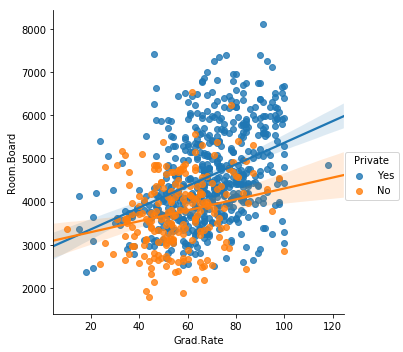

In [105]:
sns.lmplot("Grad.Rate", "Room.Board", univ, hue = "Private")

In [84]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and ``row``. Howe

In [96]:
#Color establishment for private column
def denumerisation(df):
    for x in range(len(df["Private"])):
        if df["Private"][x] == 1:
            df["Private"][x] = "Yes"
        elif df["Private"][x] == 0:
            df["Private"][x] = "No"
    return df

In [98]:
univ = denumerisation(univ)
univ.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**b. Créez un nuage de points de F.Undergrad versus Outstate où les points sont colorés par la colonne Private.**


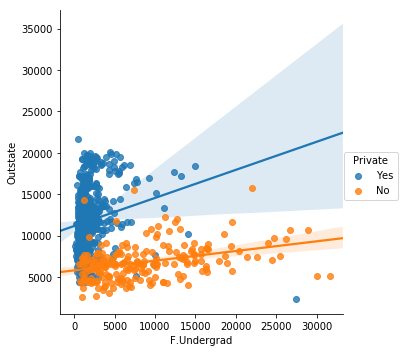

In [99]:
sns.lmplot("F.Undergrad", "Outstate", univ, hue = "Private")

**c. Que pouvez-vous dire a partir du graphique ci-dessus?**

Private schools have less undergrads and cost more for out of state students while it is the opposite for public schools

**d. Créer une boîte à moustaches (boxplot) du ratio étudiants-professeurs en fonction du type d'université**

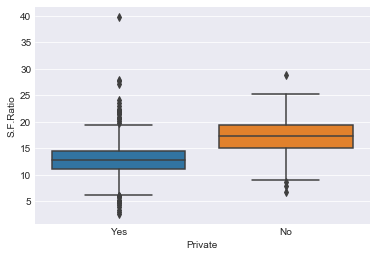

In [165]:
sns.boxplot(x = univ["Private"], y = univ["S.F.Ratio"])

**e.Créez une boîte à moustaches du pourcentage d'anciens (perc.alumni) qui font un don en fonction du type d'université**

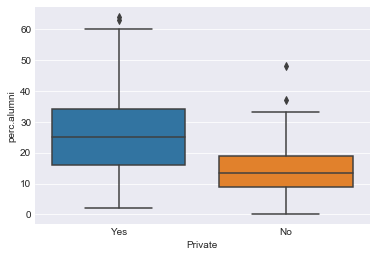

In [166]:
sns.boxplot( x = univ["Private"], y = univ["perc.alumni"])

**f. Créez un histogramme empilé montrant les frais de scolarité hors État en fonction de la colonne Private.**

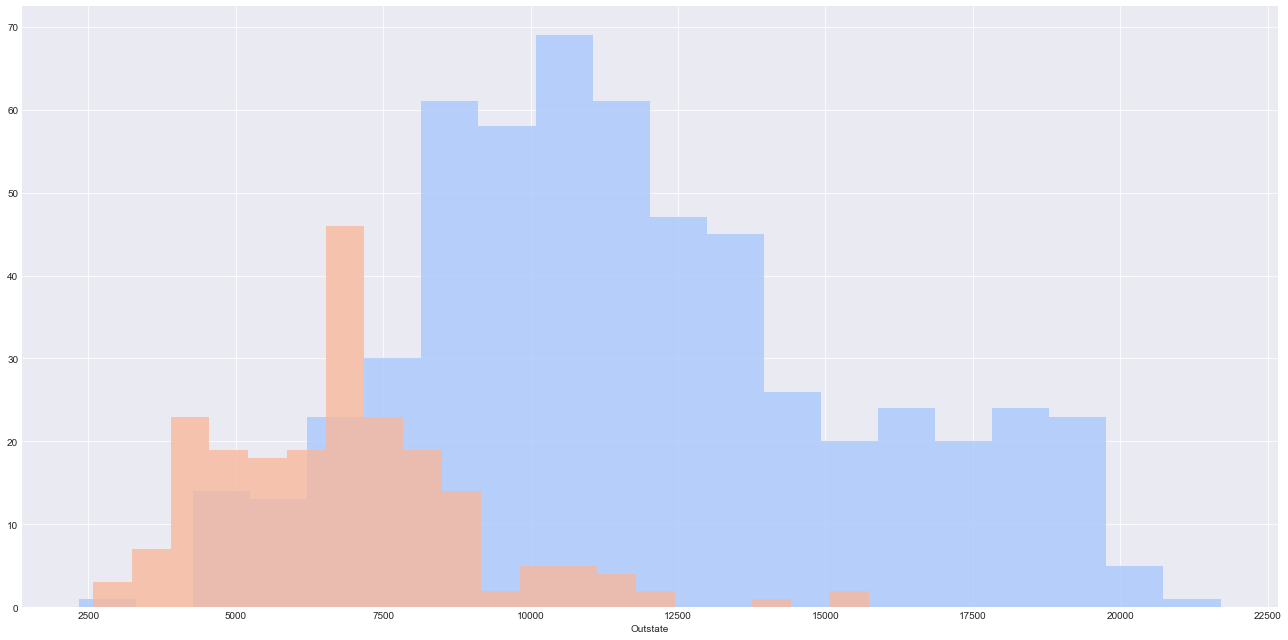

In [157]:
sns.set_style("darkgrid")
graph = sns.FacetGrid(univ, hue ="Private", aspect = 2, palette = "coolwarm", size =9) 
graph = graph.map(plt.hist, 'Outstate', histtype = "barstacked", alpha = 0.8, bins = 20) 
plt.show() 

**d. Créez un histogramme similaire pour la colonne Grad.Rate.**

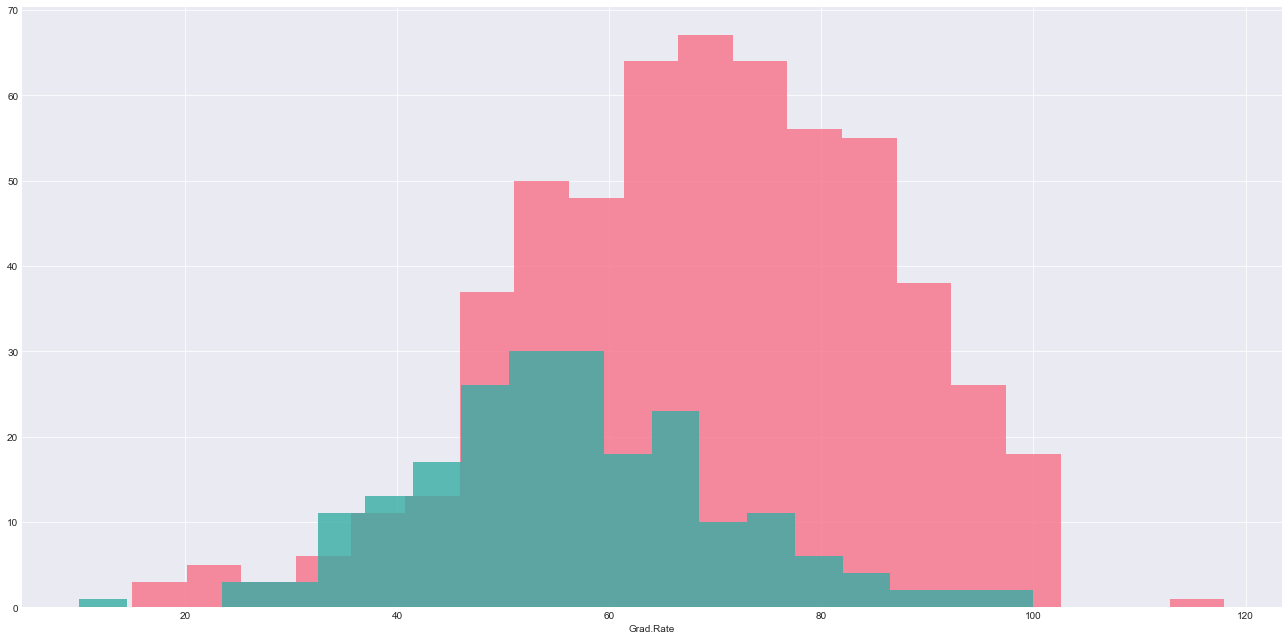

In [161]:
sns.set_style("darkgrid")
graph = sns.FacetGrid(univ, hue ="Private", aspect = 2, palette = "husl", size =9) 
graph = graph.map(plt.hist, "Grad.Rate", histtype = "barstacked", alpha = 0.8, bins = 20) 
plt.show()

**e. Quelle anomalie pouvez vous detetecter sur ce graphique?**

**Réponse**



One university has more than 100% success rate.

**f. Réglez le taux de diplomation de cette école à 100 pour que cela soit logique. Vous pouvez recevoir un avertissement et non une erreur) lors de cette opération, utilisez donc des opérations de trame de données ou refaites simplement la visualisation de l'histogramme pour vous assurer qu'elle a bien été effectuée.**

In [163]:
univ.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [167]:
def grad_normalizer(df):
    for x in range(len(df["Grad.Rate"])):
        if df["Grad.Rate"][x] > 100:
            df["Grad.Rate"][x] = 100
    return df

In [170]:
univ = grad_normalizer(univ)

**g. Vérifier que le problème est réglé**

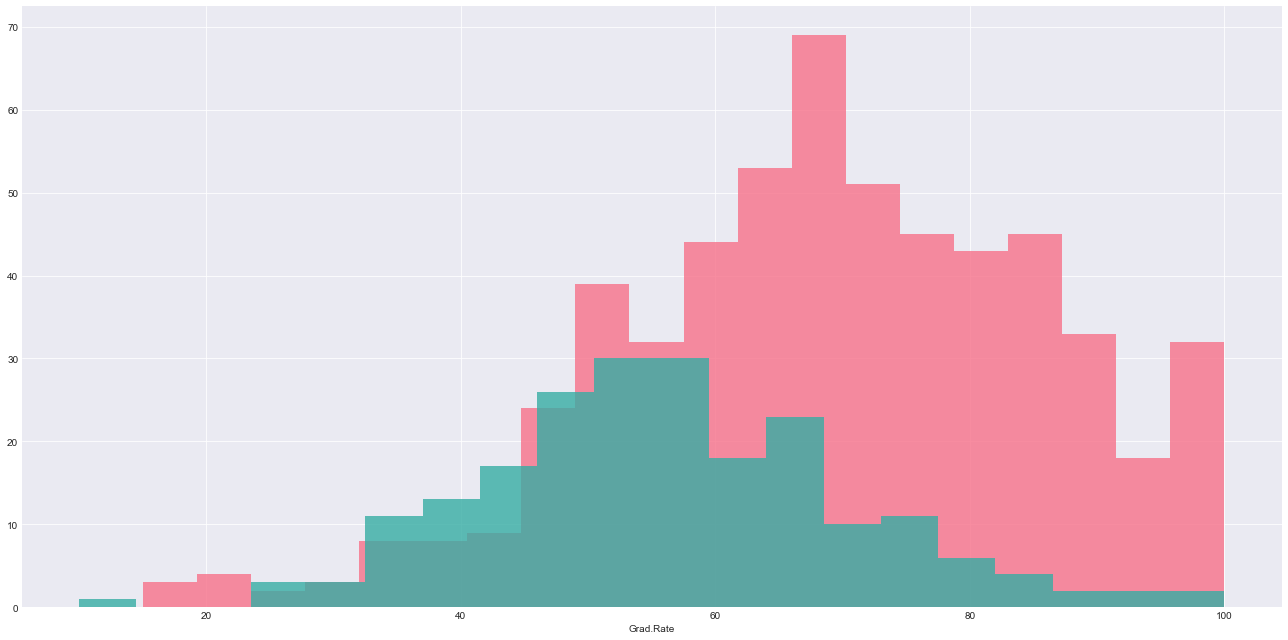

In [171]:
sns.set_style("darkgrid")
graph = sns.FacetGrid(univ, hue ="Private", aspect = 2, palette = "husl", size =9) 
graph = graph.map(plt.hist, "Grad.Rate", histtype = "barstacked", alpha = 0.8, bins = 20) 
plt.show()

## Q3: K Means Cluster Creation



**a. Créez une instance d'un modèle K Means avec 2 clusters.**

In [386]:
def numerisation(df):
    for x in range(len(df["Private"])):
        if df["Private"][x] == "Yes":
            df["Private"][x] = 1
        elif df["Private"][x] == "No":
            df["Private"][x] = 0
    return df

In [398]:
univ_n = univ.drop("Cluster", axis=1)

In [399]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, n_init = 20, max_iter = 600)
km.fit(univ_n.drop(["Private"], axis = 1))

KMeans(max_iter=600, n_clusters=2, n_init=20)

**b. Entrainer le modèle sur toutes les données à l'exception de l'étiquette Private. avec la fonction _fit_**

In [400]:
y_pred = km.predict(univ_n.drop(["Private"], axis = 1))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**c. Quels sont les vecteurs de centre de cluster?**

In [401]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

**d. Maintenant, comparez ces centres de cluster (pour toutes les dimensions / caractéristiques) aux moyennes connues des données étiquetées**

In [403]:
univ_n[univ_n['Private'] == 1].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.966372
std,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.673032
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [404]:
univ_n[univ_n['Private'] == 0].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,5370.675335,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,2190.750000,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,4307.000000,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,7722.500000,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


**e. Créer un bloc de données avec des centres de cluster et avec des noms de colonnes empruntés au bloc de données d'origine**

**Cette base de données indique-t-elle quelle étiquette correspond au collège privé (0 ou 1)?**

In [405]:
center_frame = pd.DataFrame(km.cluster_centers_)
center_frame.columns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']
center_frame

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1813.234679,1287.165919,491.044843,25.309417,53.470852,2188.548580,595.458894,10395.708520,4311.364723,541.982063,1280.336323,70.442451,77.825112,14.099701,23.174888,8932.046338,65.092676
1,10363.138889,6550.898148,2569.722222,41.490741,70.203704,13061.935185,2464.861111,10719.175926,4643.472222,595.212963,1714.203704,86.398148,91.333333,14.027778,20.074074,14170.500000,67.592593


**f. Quelles sont les étiquettes de cluster?**

In [406]:
my_labels = km.labels_
my_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Q4. Evaluation

Il n'y a pas de moyen parfait d'évaluer le clustering si vous n'avez pas les étiquettes, mais comme il ne s'agit que d'un exercice, nous avons les étiquettes, nous en profitons donc pour évaluer nos clusters, gardez à l'esprit que vous avez généralement gagné '' J'ai ce luxe dans le monde réel.

**a. Créez une nouvelle colonne pour df appelée «Cluster», qui est un 1 pour une école privée et un 0 pour une école publique.**

In [407]:
univ_n["Cluster"] = my_labels
univ_n.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


**b. Créez une matrice de confusion et un rapport de classification pour voir dans quelle mesure le clustering K Means a fonctionné sans recevoir d'étiquettes.**

In [409]:
confusion = pd.DataFrame(univ_n["Private"].copy())
confusion["Predicted"] = univ_n["Cluster"]
confusion.head()

,Private,Predicted
Abilene Christian University,1,0
Adelphi University,1,0
Adrian College,1,0
Agnes Scott College,1,0
Alaska Pacific University,1,0


In [377]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(list(confusion["Private"]), list(confusion["Predicted"]))
x

array([[138,  74],
       [531,  34]])

In [378]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

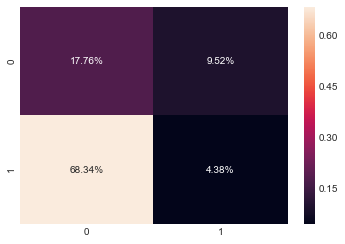

In [410]:
sns.heatmap(x/np.sum(x), annot = True, fmt = ".2%")

## Q5: Performances de clustering (par exemple, distance entre les centres de gravité)

**a. Créez deux blocs de données constitués uniquement de données universitaires privées ou publiques**

In [365]:
public = confusion[confusion["Private"] == 0]
private = confusion[confusion["Private"] == 1]